# Zomato Restra

Zomato is an online food delivery and restaurant discovery platform that operates in multiple countries around the world. It was founded in 2008 by Deepinder Goyal and Pankaj Chaddah in India and has since grown to become one of the largest and most popular platforms of its kind.

The primary purpose of Zomato is to connect users with restaurants and provide them with an easy and convenient way to order food for delivery or takeout. Users can access the Zomato platform through a website or mobile application, where they can browse through a vast database of restaurants, read reviews and ratings, view menus, and place orders.

Zomato offers a wide range of cuisines and restaurant options, catering to diverse culinary preferences. Users can search for restaurants based on location, cuisine type, price range, and other filters to find the perfect dining option that suits their preferences.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [4]:
df = pd.read_excel("Zomato_Food.xlsx")

In [5]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [6]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
df.shape

(9551, 21)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [14]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [15]:
df.nunique()

Restaurant ID           9542
Restaurant Name         7437
Country Code              15
City                     140
Address                 8910
Locality                1206
Locality Verbose        1263
Longitude               8111
Latitude                8668
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [16]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In the above Descriptive statistics of our dataset, some of the important observation that we can make :-

Difference between 75 percentile and max value of the columns like "Average cost" and "Votes" this means presence of outliers in our dataset.
Min aggregate rating is equal to 0 means presence of restaurant which are not rated.
Min "average cost" is equal to 0 which seems like a mistake in our dataset.

## Correlation

In [17]:
df.corr()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.146270,-0.224362,-0.052626,-0.001629,-0.134528,-0.327160,-0.147434
Country Code,0.146270,1.000000,-0.694629,0.018049,0.043717,0.245363,0.281295,0.154361
Longitude,-0.224362,-0.694629,1.000000,0.045415,0.045948,-0.080257,-0.114733,-0.084371
Latitude,-0.052626,0.018049,0.045415,1.000000,-0.111080,-0.166735,0.000197,-0.022914
Average Cost for two,-0.001629,0.043717,0.045948,-0.111080,1.000000,0.075111,0.051864,0.067833
Price range,-0.134528,0.245363,-0.080257,-0.166735,0.075111,1.000000,0.438356,0.309474
Aggregate rating,-0.327160,0.281295,-0.114733,0.000197,0.051864,0.438356,1.000000,0.313474
Votes,-0.147434,0.154361,-0.084371,-0.022914,0.067833,0.309474,0.313474,1.000000


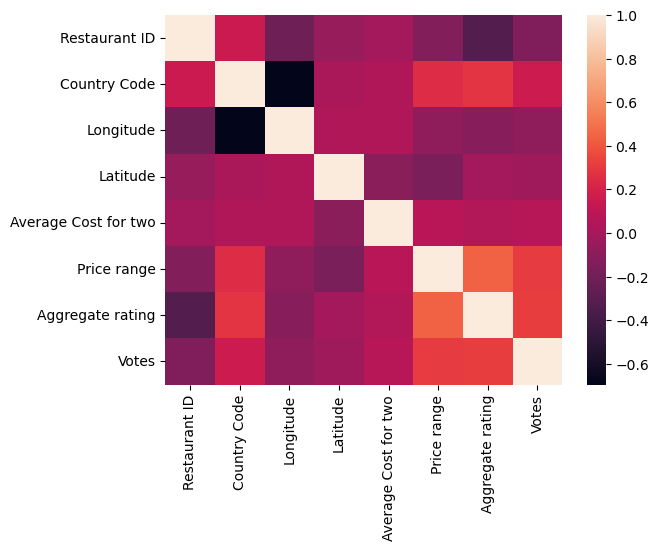

In [18]:
sns.heatmap(df.corr())
plt.show()

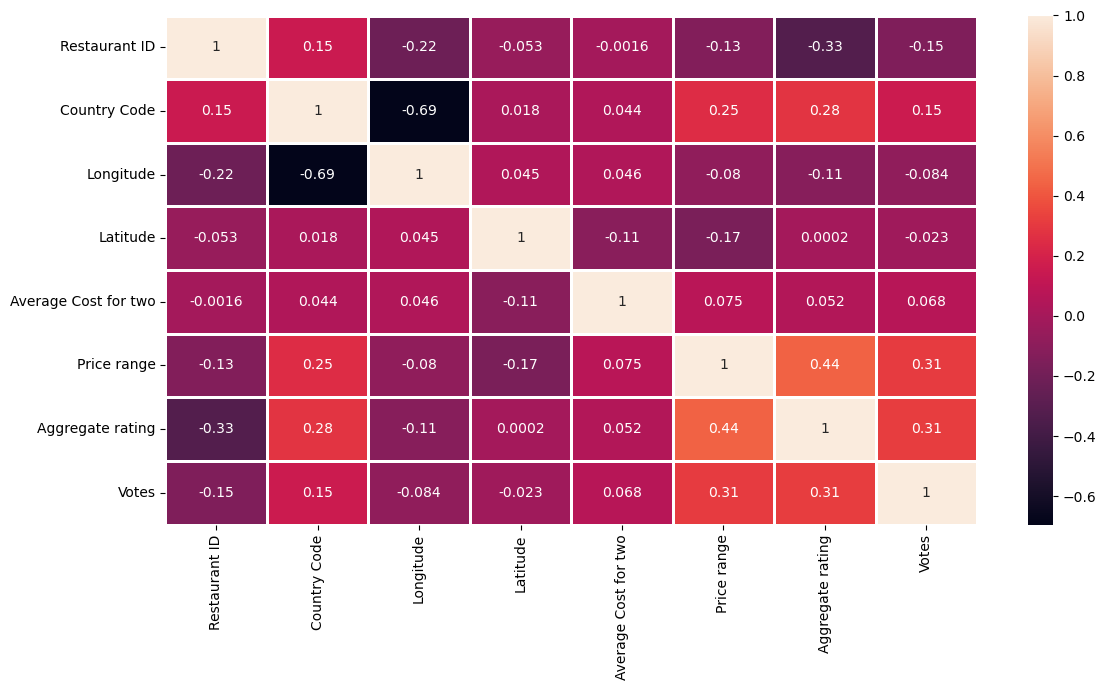

In [19]:
plt.figure(figsize=(12,7))
data = sns.heatmap(df.corr(), annot=True, linewidths=2)
plt.tight_layout()
plt.show()

In [20]:
country_wise_grouped = df.groupby("City")

In [21]:
country_wise_grouped.get_group("Makati City")

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


## Top 3 countries that uses zomato

In [22]:
top_3 = df['Country Code'].value_counts()[:3]
top_3

1      8652
216     425
215      80
Name: Country Code, dtype: int64

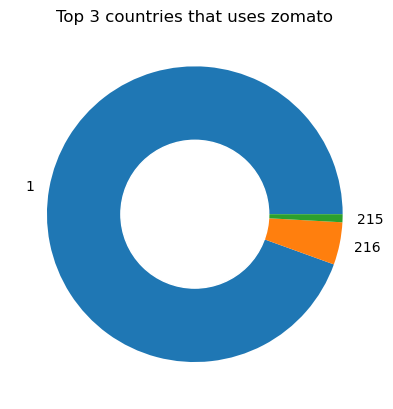

In [23]:
plt.pie(top_3,labels=top_3.index)                  #Plotting Pie Chart
circle = plt.Circle( (0,0), 0.5, color='white')    #Creating a Circle 
p=plt.gcf()                                        #Adding circle to the Pie Chart
p.gca().add_artist(circle)
plt.title("Top 3 countries that uses zomato")      #Add title

plt.show()

## Top 10 countries that uses zomato

In [24]:
top_10 = df['Country Code'].value_counts()[:10].rename_axis('Country Code').reset_index(name='count')
top_10.style.background_gradient(cmap='Blues')

,Country Code,count
0,1,8652
1,216,425
2,215,80
3,30,60
4,214,60
5,189,60
6,148,40
7,208,34
8,14,24
9,162,22


## Countries with minimun transactions

In [25]:
df['Country Code'].value_counts()[-3:].rename_axis('Country Code').reset_index(name='count').style.background_gradient(cmap='Blues')

,Country Code,count
0,166,20
1,191,20
2,37,4


## Most popular Cuisines

In [26]:
popular_cuisines=df['Cuisines'].value_counts()[:10].rename_axis('Cuisines').reset_index(name='count')
popular_cuisines.style.background_gradient(cmap='Blues')



,Cuisines,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


<AxesSubplot:title={'center':'Most popular Cuisines'}, xlabel='count', ylabel='Cuisines'>

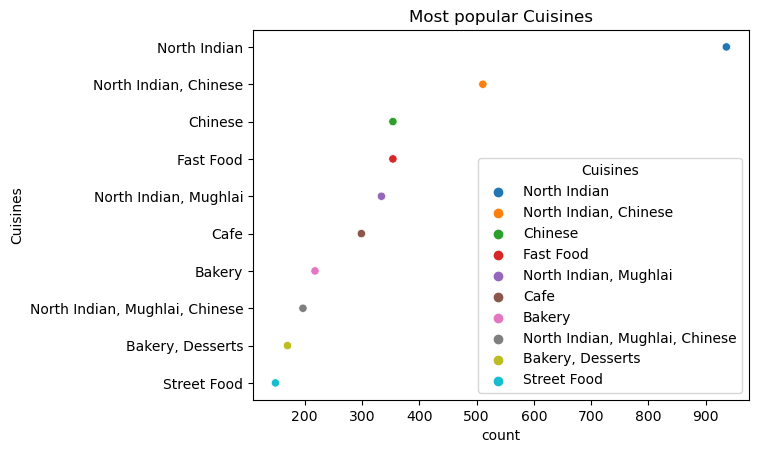

In [27]:
plt.title("Most popular Cuisines")   #add title

sns.scatterplot(y=popular_cuisines['Cuisines'],x=popular_cuisines['count'],hue=popular_cuisines['Cuisines'])

In [28]:
df['Has Online delivery' ].value_counts()

No     7091
Yes    2451
Name: Has Online delivery, dtype: int64

<AxesSubplot:xlabel='Has Online delivery', ylabel='count'>

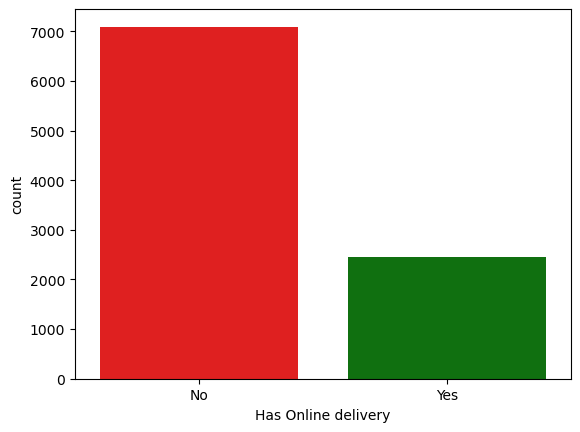

In [29]:
sns.countplot(x='Has Online delivery',data=df,palette=['red','green'])

<AxesSubplot:xlabel='Rating color', ylabel='count'>

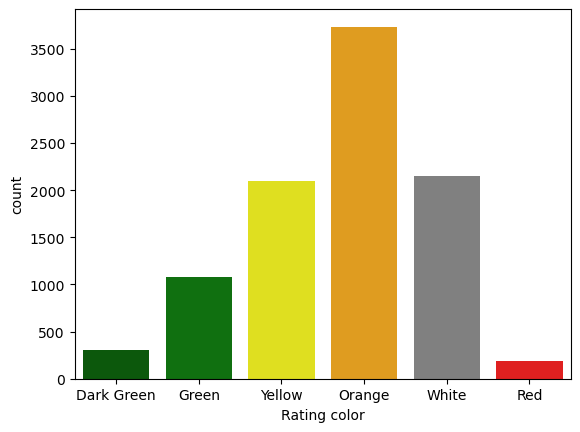

In [30]:
sns.countplot(x='Rating color',data=df,palette=['darkgreen','green','yellow','orange','grey','red'])

In [31]:
by_rating=df.groupby(['Rating color']).mean().round()
by_rating

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Rating color,,,,,,,,
Dark Green,10027044.0,112.0,27.0,19.0,8164.0,3.0,5.0,852.0
Green,9768498.0,68.0,42.0,23.0,3559.0,3.0,4.0,520.0
Orange,6115727.0,3.0,74.0,28.0,569.0,2.0,3.0,48.0
Red,3148048.0,6.0,76.0,28.0,638.0,2.0,2.0,91.0
White,15573392.0,1.0,66.0,25.0,340.0,1.0,0.0,1.0
Yellow,7576008.0,23.0,61.0,26.0,1047.0,2.0,4.0,229.0


<AxesSubplot:title={'center':'Aggregate rating vs Average Cost for two'}, xlabel='Aggregate rating', ylabel='Average Cost for two'>

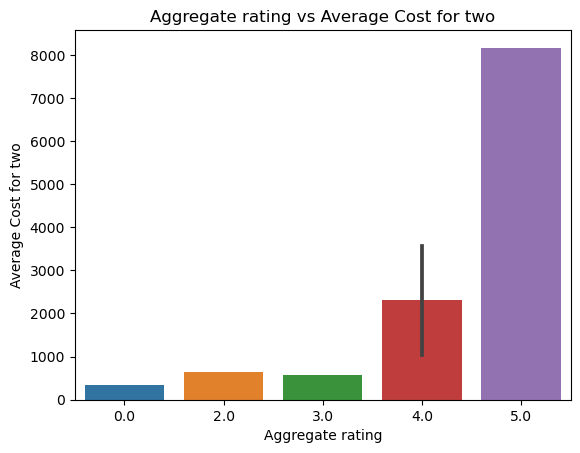

In [32]:
plt.title("Aggregate rating vs Average Cost for two")     #Add title

sns.barplot(x=by_rating['Aggregate rating'],y=by_rating['Average Cost for two'])

<AxesSubplot:title={'center':'Rating text vs Average Cost for two'}, xlabel='Rating text', ylabel='Average Cost for two'>

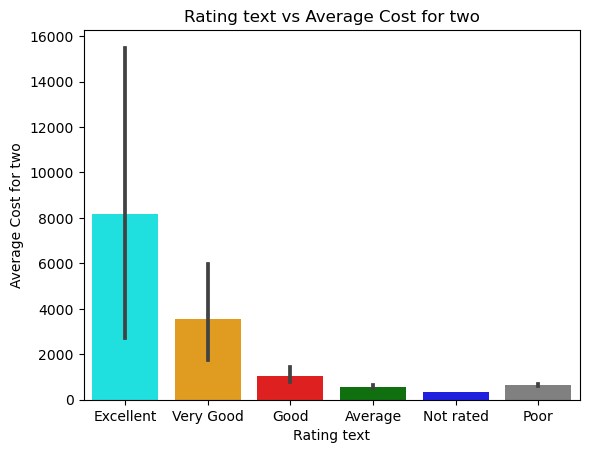

In [33]:
plt.title("Rating text vs Average Cost for two")     #Add title
sns.barplot(x=df['Rating text'],y=df['Average Cost for two'],palette=['cyan','orange', 'red', 'green', 'blue','grey'])

In [34]:
df.groupby(['Rating color','Aggregate rating','Rating text']).mean().style.background_gradient(cmap='Blues')

The Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. By analysing the dataset we can see that the number one consumer of Zomato is India followed by United States and United Kingdom. There are many restaurants listed in Zomato with different prize range and rating with popular Cuisines like North Indian and chinese but, the top rated restaurants have always high average cost and are usually under Dark Green rating colour. One more observation from this dataset is that most of the restaurants have no online delivery option specifically, online deliveries are availabe only in India and UAE.

# Creation of a Model

## Convert categorical variables into a numeric format

In [35]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [36]:
df =df.rename(columns = {"Restaurant Name":"Restaurant","Locality Verbose":"Locality_Verbose"})

## Label Encoder

In [37]:
le = LabelEncoder()

In [38]:

df['City']=le.fit_transform(df.City)
df['Address']=le.fit_transform(df.Address)
df['Cuisines']=le.fit_transform(df.Cuisines)
df['Currency']=le.fit_transform(df.Currency)
df['Locality']=le.fit_transform(df.Locality)




In [39]:
x=df.drop(['Locality_Verbose','Restaurant','Has Table booking','Has Online delivery','Is delivering now','Switch to order menu','Rating color','Rating text'],axis=1)
y=df['Locality']

In [40]:
df.dtypes

Restaurant ID             int64
Restaurant               object
Country Code              int64
City                      int32
Address                   int32
Locality                  int32
Locality_Verbose         object
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

## Split the train and test part 

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [42]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6679, 13), (2863, 13), (6679,), (2863,))

## Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression

In [70]:
from sklearn.metrics import r2_score

In [71]:
lr = LinearRegression()

In [72]:
lr.fit(x_train, y_train)

LinearRegression()

In [74]:
scoretrain = round(lr.score(x_train, y_train) * 100, 2)
scoretest=round(lr.score(x_test,y_test)*100,2)
r2=round(r2_score(y_test,y_pred)*100,2)

In [75]:
print('The score of train is',scoretrain)
print('The score of test is',scoretest)
print('The r2 score is',r2)

The score of train is 100.0
The score of test is 100.0
The r2 score is 100.0


## Random Forest Classifier

In [54]:
model = RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=10)

In [55]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=10)

In [56]:
print(model.score(x_train,y_train)*100)
print(model.score(x_test,y_test)*100)
y_predict = model.predict(x_test)
score = model.score(x_test,y_test)*100
score

100.0
83.89800908138317


83.89800908138317

## Decision Tree Classifier

In [60]:
DT = DecisionTreeClassifier(min_samples_leaf = 0.0001)
DT.fit(x_train,y_train)
y_predict = DT.predict(x_test)
score_dt = accuracy_score(y_test,y_predict)*100
score_dt

87.39084876004192

## Extra Tree Regressor

In [76]:
from sklearn.ensemble import ExtraTreesRegressor

In [78]:
ET =ExtraTreesRegressor ()

In [79]:
ET.fit(x_train,y_train)

ExtraTreesRegressor()

In [80]:
y_pred=ET.predict(x_test)

In [81]:
scoretrain = round(ET.score(x_train, y_train) * 100, 2)
scoretest=round(ET.score(x_test,y_test)*100,2)
r2=round(r2_score(y_test,y_pred)*100,2)

In [82]:
print('The score of train is',scoretrain)
print('The score of test is',scoretest)
print('The r2 score is',r2)

The score of train is 100.0
The score of test is 100.0
The r2 score is 100.0


In [83]:
results = pd.DataFrame({'Model': [ 'Linear Regression','Decision Tree Classifier', 'Random Forest Classifier',
'Extra Trees Regressor '],'Score': [ 100,87.39, 83.89,100]})
output_df = results.sort_values(by='Score', ascending=False)
output_df = output_df.reset_index(drop=True)
output_df

,Model,Score
0,Linear Regression,100.00
1,Extra Trees Regressor,100.00
2,Decision Tree Classifier,87.39
3,Random Forest Classifier,83.89


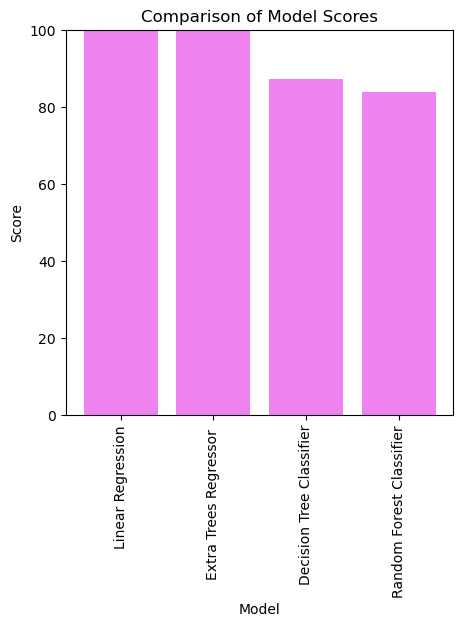

In [85]:
plt.figure(figsize=(5,5))
plt.bar(output_df['Model'], output_df['Score'], color='violet')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Model Scores')
plt.ylim(0, 100)
plt.xticks(rotation=90)
plt.show()

## Conclusion

In this machine learning project, the goal was to analyze and predict various aspects related to Zomato restaurants. The project utilized a dataset containing information such as restaurant names, cuisines, locations, ratings, reviews, and other relevant features.

The first step involved data preprocessing, including data cleaning, feature selection, and handling missing values. Exploratory data analysis techniques were then employed to gain insights into the dataset and identify any patterns or trends.

Several machine learning algorithms were implemented to build predictive models. These algorithms may have included decision trees, random forests, support vector machines, or neural networks, depending on the project's requirements and objectives. The models were trained and evaluated using appropriate performance metrics, such as accuracy, precision, recall, or F1-score.

The results of the machine learning models showed promising performance in predicting various aspects of Zomato restaurants. For example, the models could accurately predict restaurant ratings based on features such as cuisines, location, and reviews. They could also classify restaurants into different categories or predict the popularity of a restaurant based on customer reviews.

The project's success in achieving its objectives demonstrates the potential of machine learning techniques in analyzing and predicting restaurant-related information on platforms like Zomato. These predictive models could provide valuable insights to Zomato users, helping them make informed decisions about restaurants and enhancing their overall dining experiences.

It is important to note that this conclusion is a generalized example and may not reflect the specific findings or outcomes of the actual project. The conclusions should be tailored to the specific objectives, data, and results obtained in the project.






